# Mini Project to identify Personal Loan Customers.

Bank is interested in converting its liability customers to asset customers by offering them personal loans.  
A campaign run the previsous year showed a conversin rate of 9%.  This year they are interested in increasing the conversion
rate by targeting high probaility customers.   This is a model to predict those customers that are highly likely to accept the 
personal loan offer.

### Importing libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

## Load Data

In [45]:
df = pd.read_excel( 'Bank_Personal_Loan_Modelling-1.xlsx' , 'Data' )
df.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [46]:
df.head(2)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [3]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Observation on given data
Min experience is showing negative values, which is incorrect, so we have to clean that column 

## Data distribution chart

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


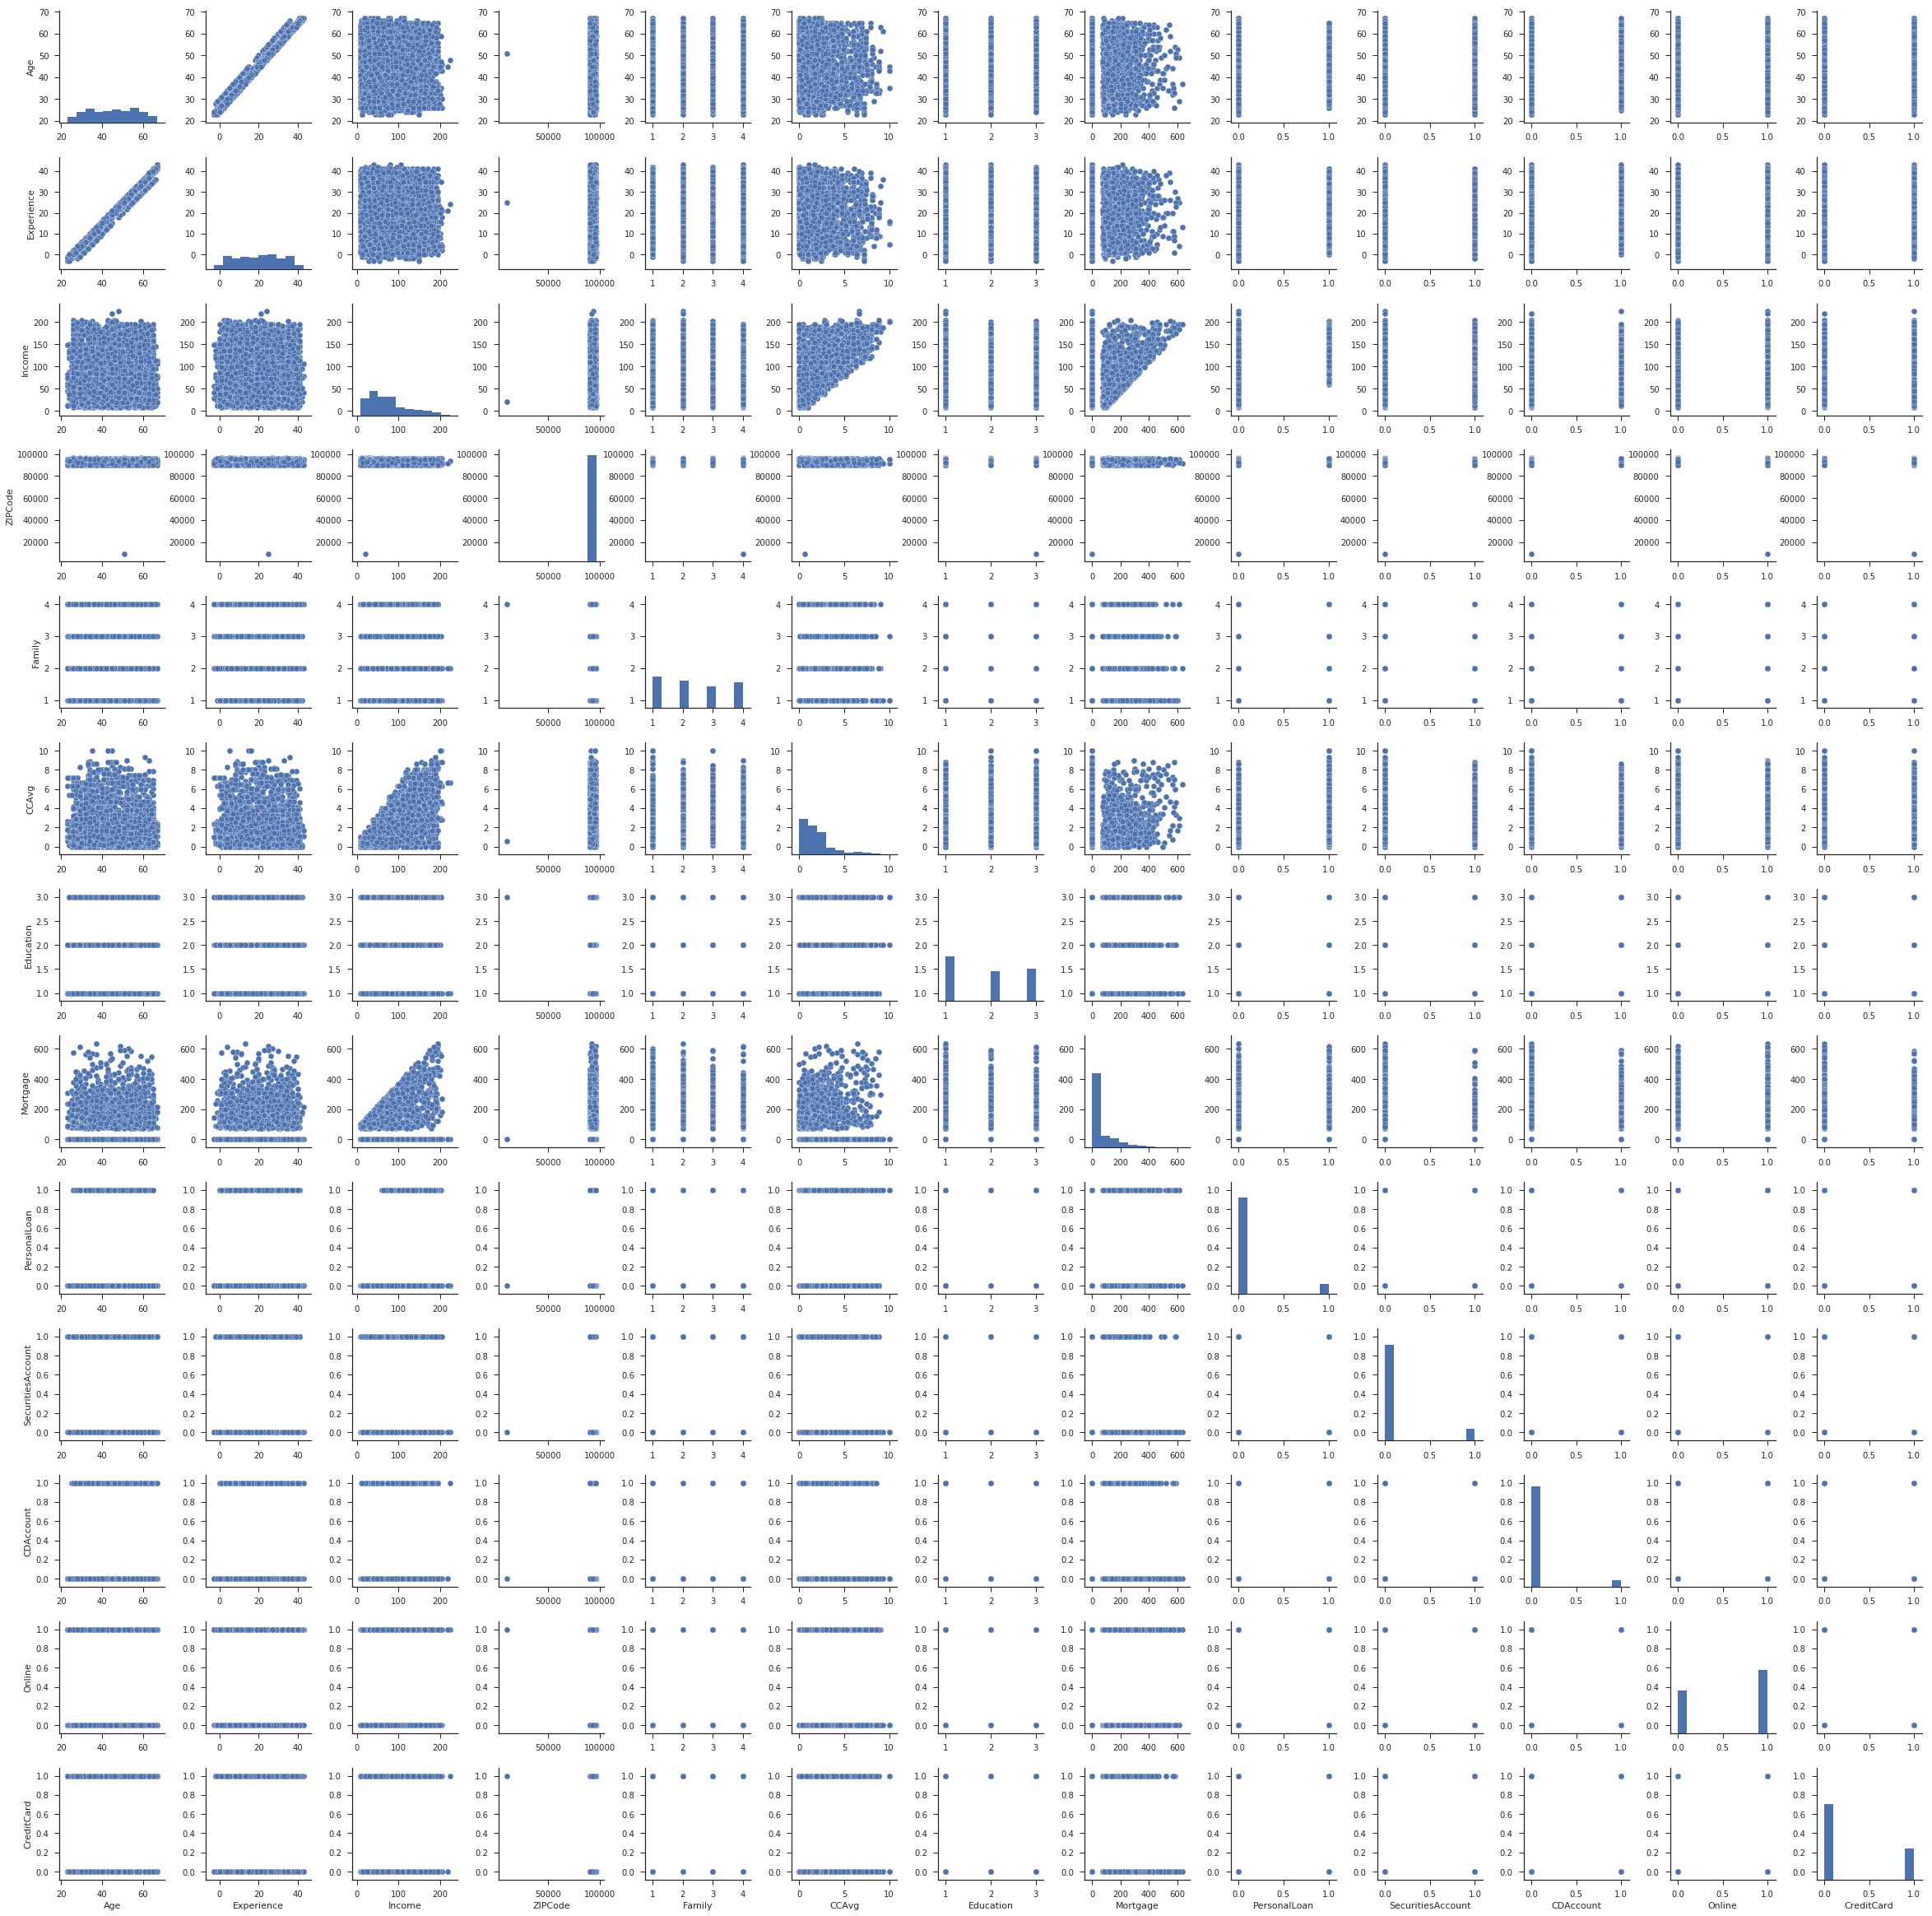

In [142]:
plt = sns.pairplot(df[['Age','Experience','Income','ZIPCode','Family','CCAvg' ,'Education' , 'Mortgage','PersonalLoan','SecuritiesAccount','CDAccount','Online','CreditCard']] )
df.head(1)

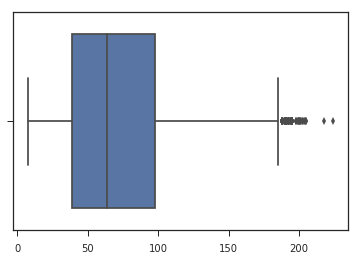

In [143]:
plt = sns.boxplot(df[['Income']])#,'Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

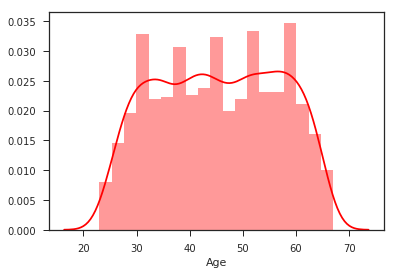

In [144]:
sns.distplot( df['Age'], color = 'r')

### Observation
Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.

## Negative Experience cleaning

In [20]:
dfposExp = df.loc[df['Experience'] >0]
mask = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[mask]['ID'].tolist()

In [21]:
for id in mylist:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfposExp[(dfposExp.Age == age) & (dfposExp.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp

In [147]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## what is the influence of Income level on whether a customer takes a personal loan across the education levels. 

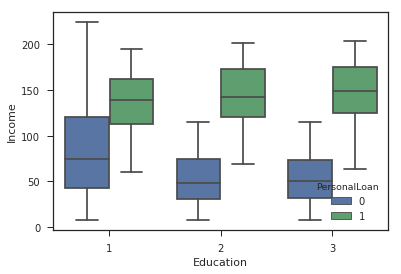

In [148]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=df)

### Observation 
The box plots show that those with education level 1 have higher incomes.  But customers who go for personal loans have the same income distribution regardless of the education level.

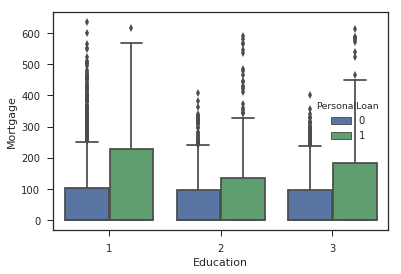

In [149]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=df)

### Observation
Customers who taken loan also have higher mortgages.

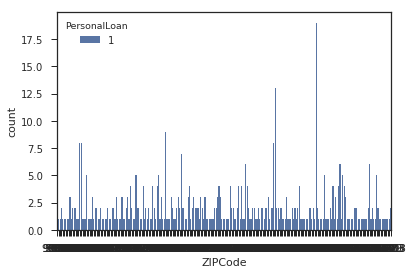

In [150]:
sns.countplot(x="ZIPCode", data=df[df.PersonalLoan==1], hue ="PersonalLoan",orient ='v')

In [151]:
zipcode_top5 = df[df.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

### Observation
Top 5 locations who appled personal loan before 

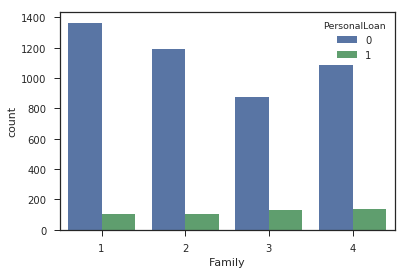

In [37]:
sns.countplot(x="Family", data=df,hue="PersonalLoan")

### Observations
### Does family size have any influence on whether a customer accepts a personal loan offer?

In [38]:
familysize_no = np.mean( df[df.PersonalLoan == 0]['Family'] )
familysize_no

2.3734513274336284

In [39]:
familysize_yes = np.mean( df[df.PersonalLoan == 1]['Family'] )
familysize_yes

2.6124999999999998

In [40]:
from scipy import stats

stats.ttest_ind(df[df.PersonalLoan == 1]['Family'], df[df.PersonalLoan == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

### Observation 
Family size seems to have no impact on decision to take a loan.

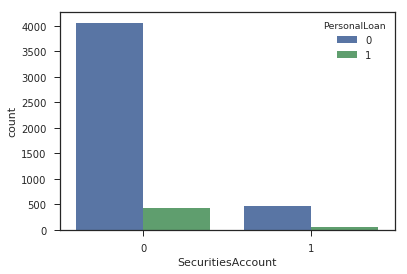

In [42]:
sns.countplot(x="SecuritiesAccount", data=df,hue="PersonalLoan")

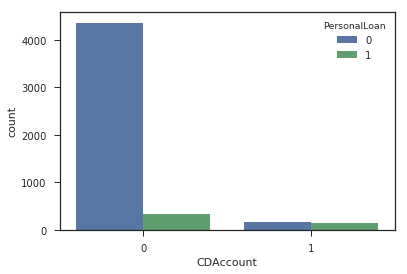

In [43]:
sns.countplot(x="CDAccount", data=df,hue="PersonalLoan")

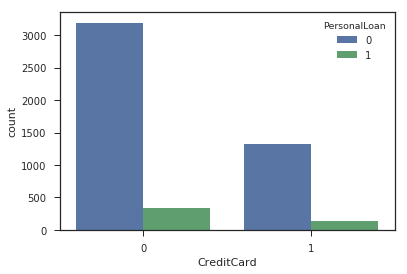

In [44]:
sns.countplot(x="CreditCard", data=df,hue="PersonalLoan")

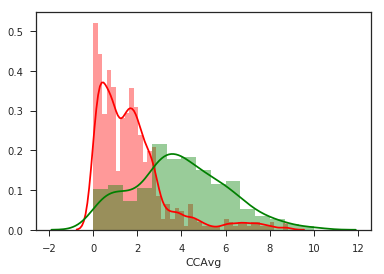

In [45]:
sns.distplot( df[df.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['CCAvg'], color = 'g')

### Observation
Customers who have taken personal loan have higher credit card average than those who did nottake.  So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

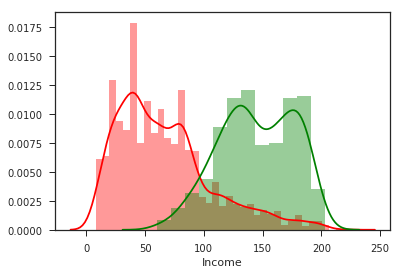

In [46]:
sns.distplot( df[df.PersonalLoan == 0]['Income'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Income'], color = 'g')

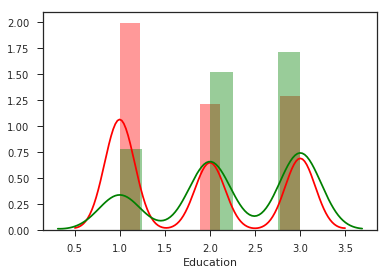

In [47]:
sns.distplot( df[df.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( df[df.PersonalLoan == 1]['Education'], color = 'g')

## Correlation comparison with heat map

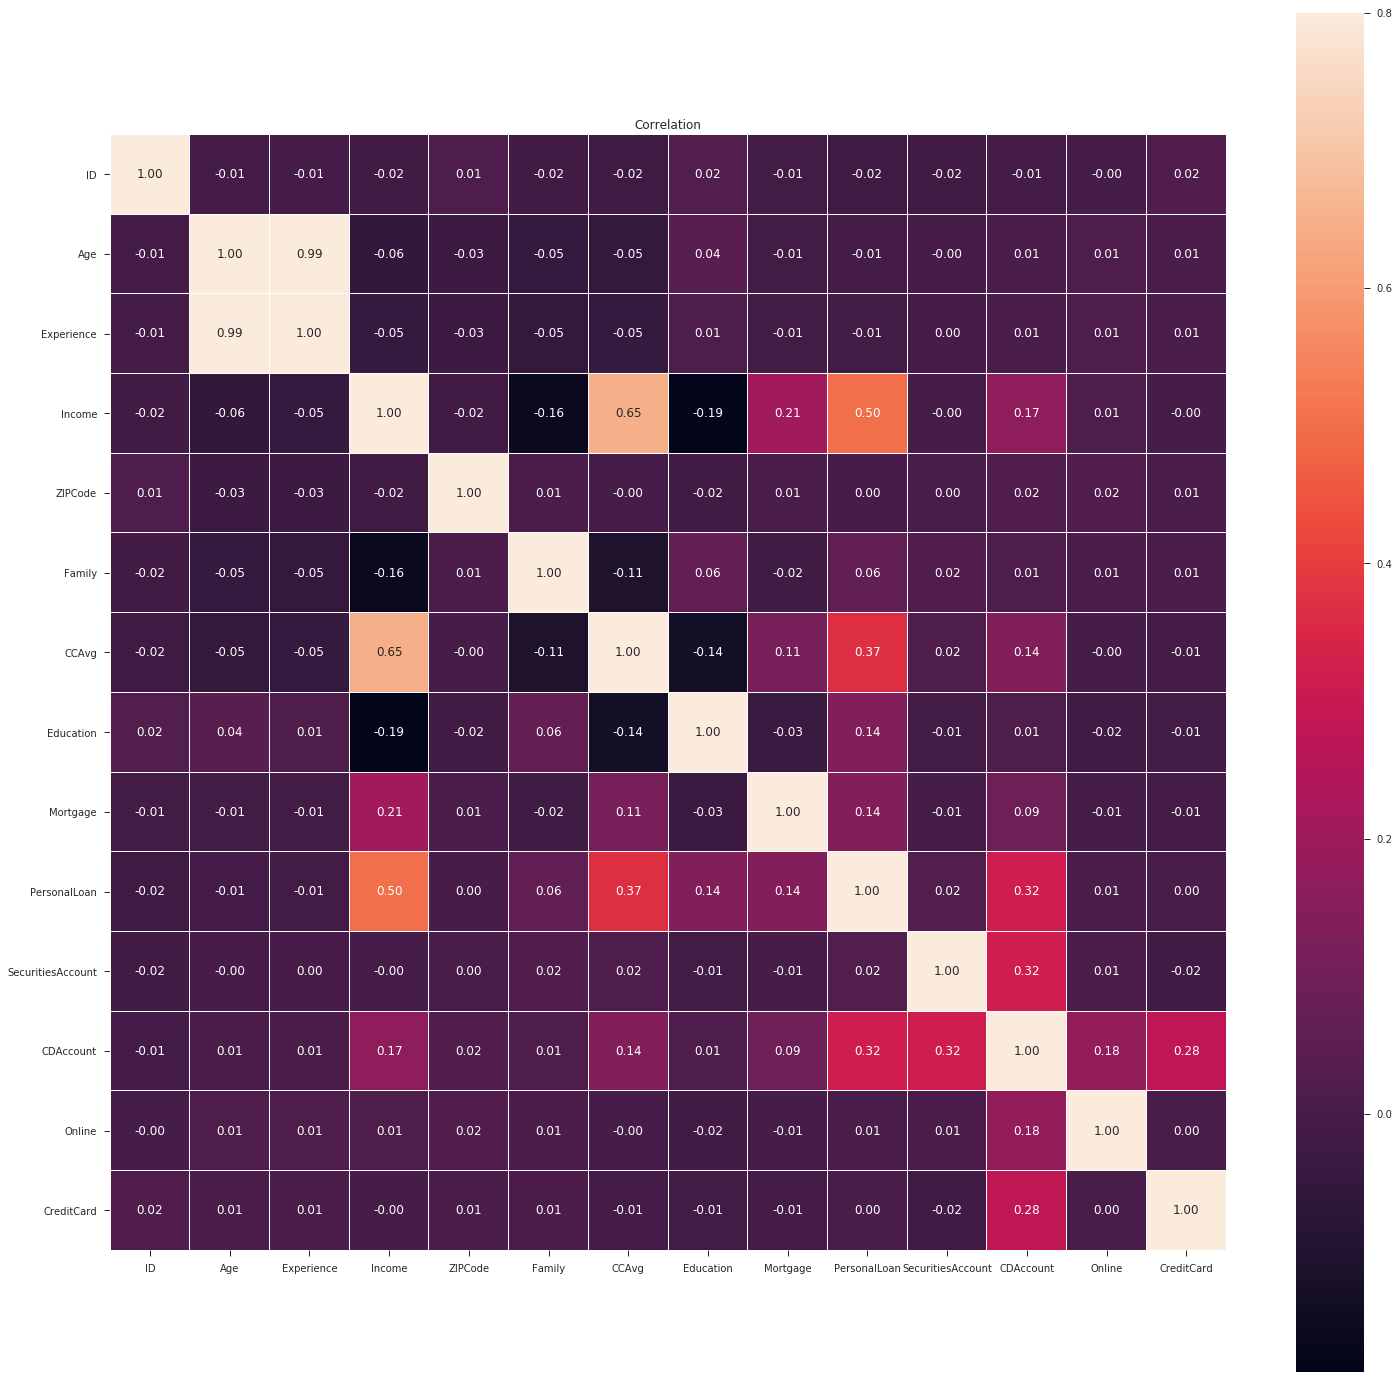

In [34]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

### Observation 
1. Age and  Experoence is highly corelated
2. Income and CCAvg also corelated

### Splittin Data to Train And Test

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [12]:
train_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
test_set.describe()

,Age,Income,ZIPCode,Family,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("PersonalLoan")
test_labels = test_set.pop("PersonalLoan")

## DecisionTreeClassifier

In [258]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [259]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [260]:
dt_model.score(test_set , test_labels)

0.97399999999999998

##  Naive Bayes

In [268]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.91666666666666663

In [269]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


## RandomForestClassifier

In [271]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

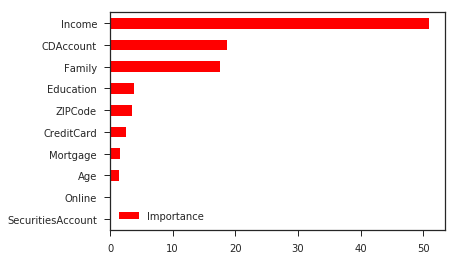

In [274]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [275]:
predicted_random=randomforest_model.predict(test_set)

In [276]:
randomforest_model.score(test_set,test_labels)

0.92466666666666664

## KNeighborsClassifier

In [41]:
train_set_indep = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = df["PersonalLoan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [42]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [43]:
print(acc)

0.944629753169
